In [50]:
%matplotlib inline

import cv2
import json
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
DATA_FILE = '/home/dennis/projects/wcc/data.npy'
META_FILE = '/home/dennis/projects/wcc/data.json'

In [3]:
with open(DATA_FILE, 'rb') as f:
    use_samples = np.load(f)
    use_probs = np.load(f)
    test_samples = np.load(f)
    test_probs = np.load(f)
with open(META_FILE, 'r') as f:
    metadata = json.load(f)

sample shape (1600, 1600, 3) with datatype uint8
prob shape (1600, 1600) with datatype float16


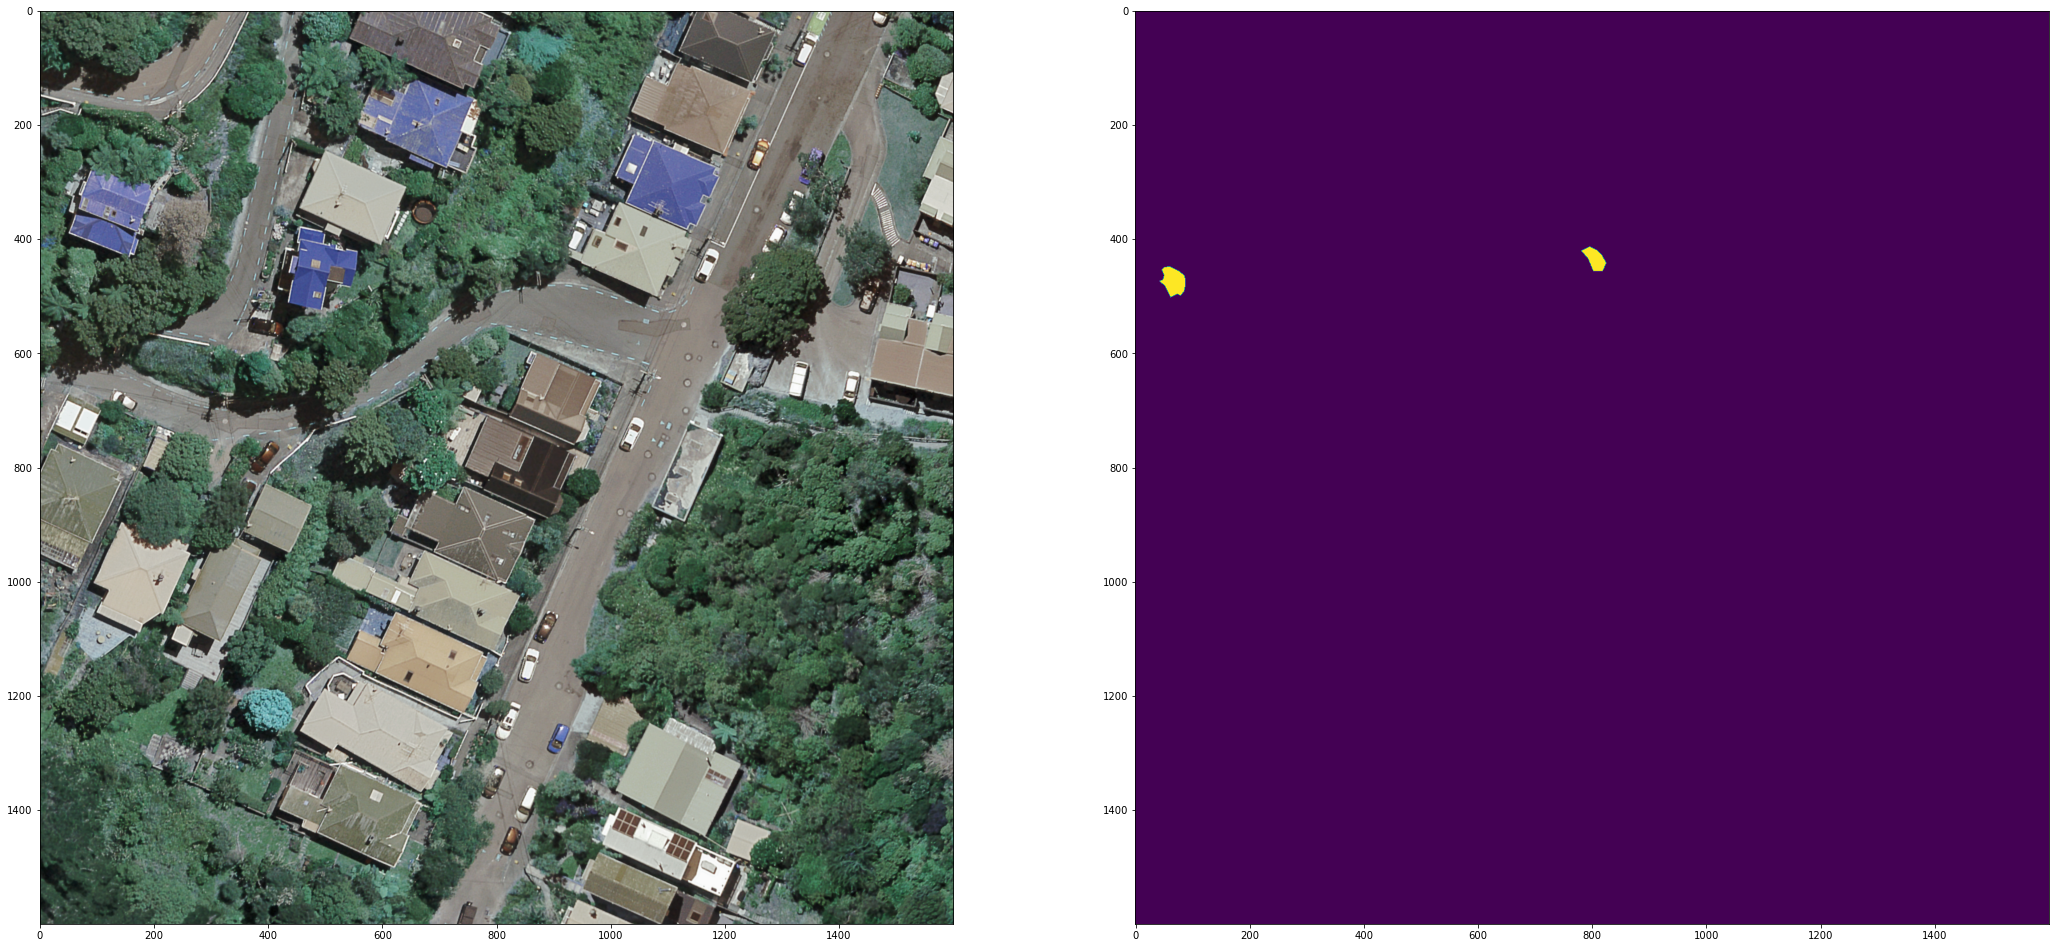

In [13]:
index = np.random.randint(len(use_samples))
fig, ax = plt.subplots(1, 2, figsize=(36,24))
sample = use_samples[index]
print(f'sample shape {sample.shape} with datatype {sample.dtype}')
ax[0].imshow(sample)
prob = use_probs[index]
print(f'prob shape {prob.shape} with datatype {prob.dtype}')
ax[1].imshow((prob * 255).astype(np.uint8))
plt.show()

sample shape (800, 800, 3) with datatype uint8
prob shape (800, 800) with datatype float16


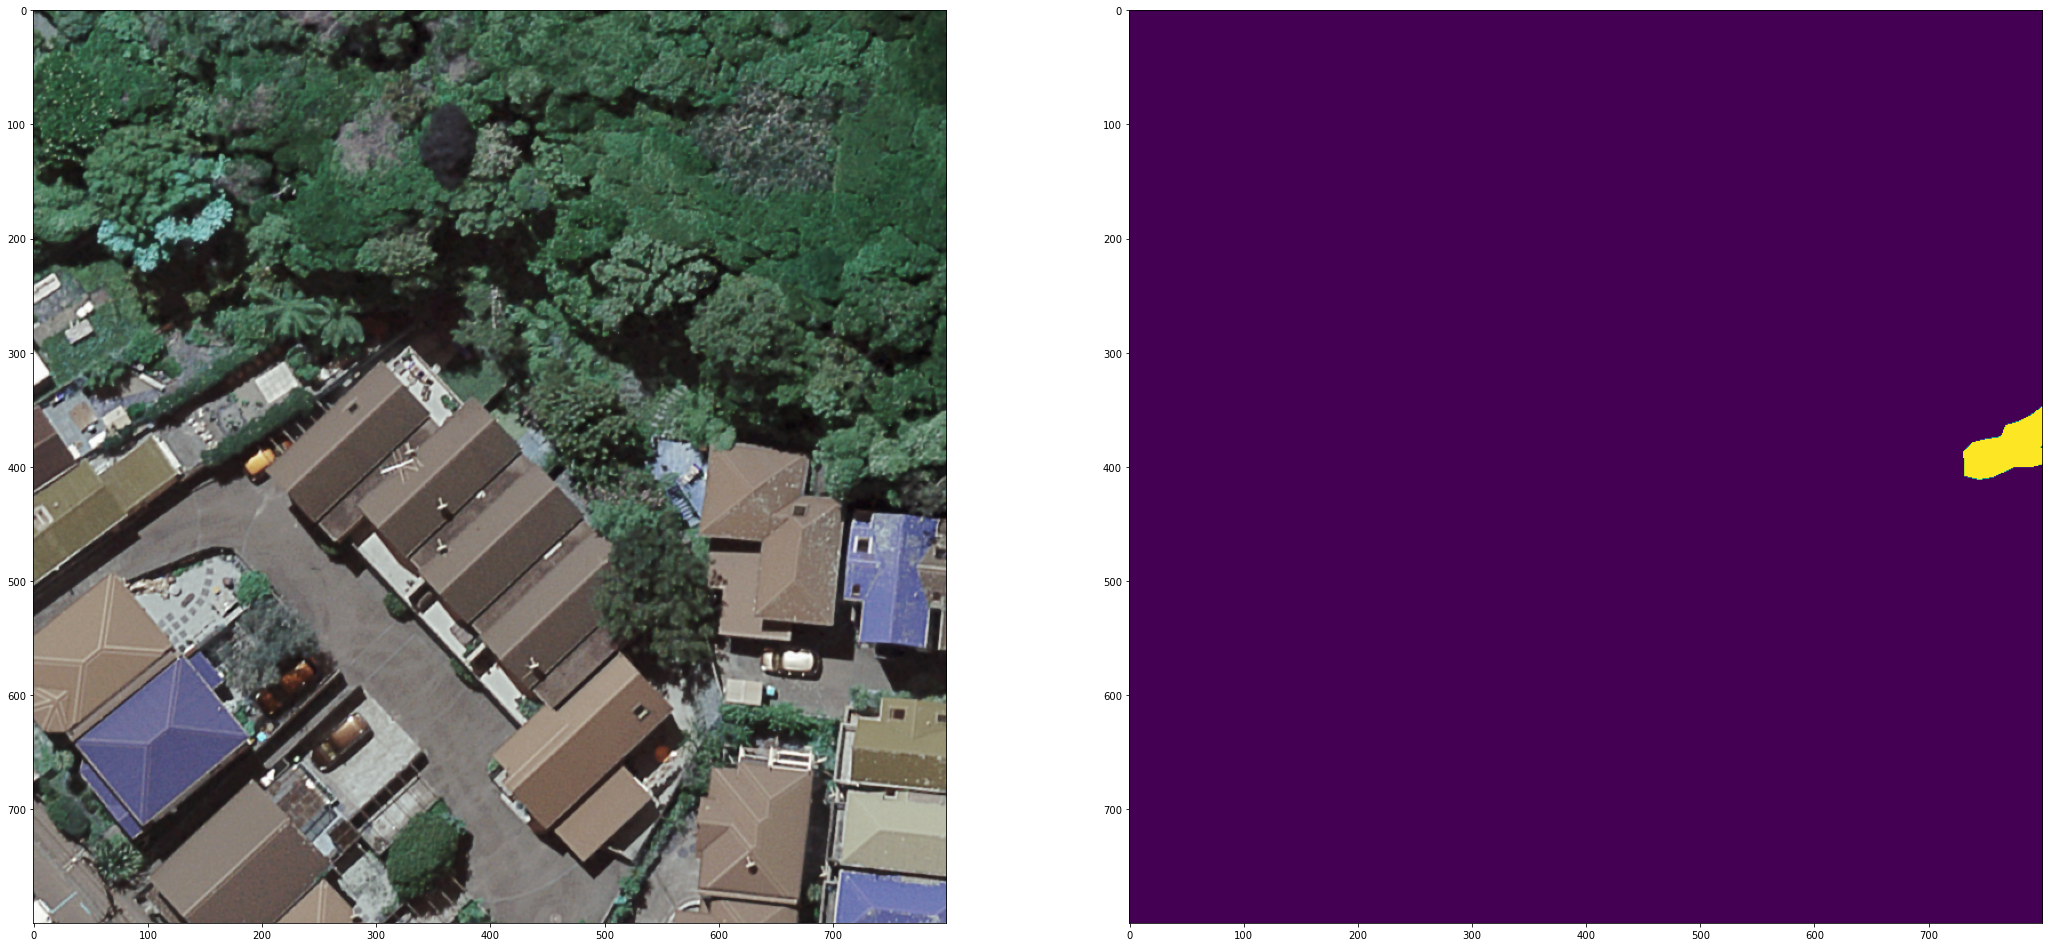

In [82]:
index = np.random.randint(len(test_samples))
fig, ax = plt.subplots(1, 2, figsize=(36,24))
sample = test_samples[index]
print(f'sample shape {sample.shape} with datatype {sample.dtype}')
ax[0].imshow(sample)
prob = test_probs[index]
print(f'prob shape {prob.shape} with datatype {prob.dtype}')
ax[1].imshow((prob * 255).astype(np.uint8))
plt.show()

In [65]:
def rotate_and_clip(image, angle):

    # calculate clipping to drop skewed parts of rotated image
    clip_size = (math.cos(math.radians(angle)) * np.array(image.shape)).astype(np.int16)
    clip_h = min(clip_size[0], image.shape[0])
    clip_w = min(clip_size[1], image.shape[1])
    base_h = (image.shape[0] - clip_h) // 2
    base_w = (image.shape[1] - clip_w) // 2
    print(f'{clip_h} {clip_w} {base_h} {base_w}')
    
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result[base_h:base_h+clip_h,base_w:base_w+clip_w]

772 772 14 14
692 692 54 54
565 565 117 117


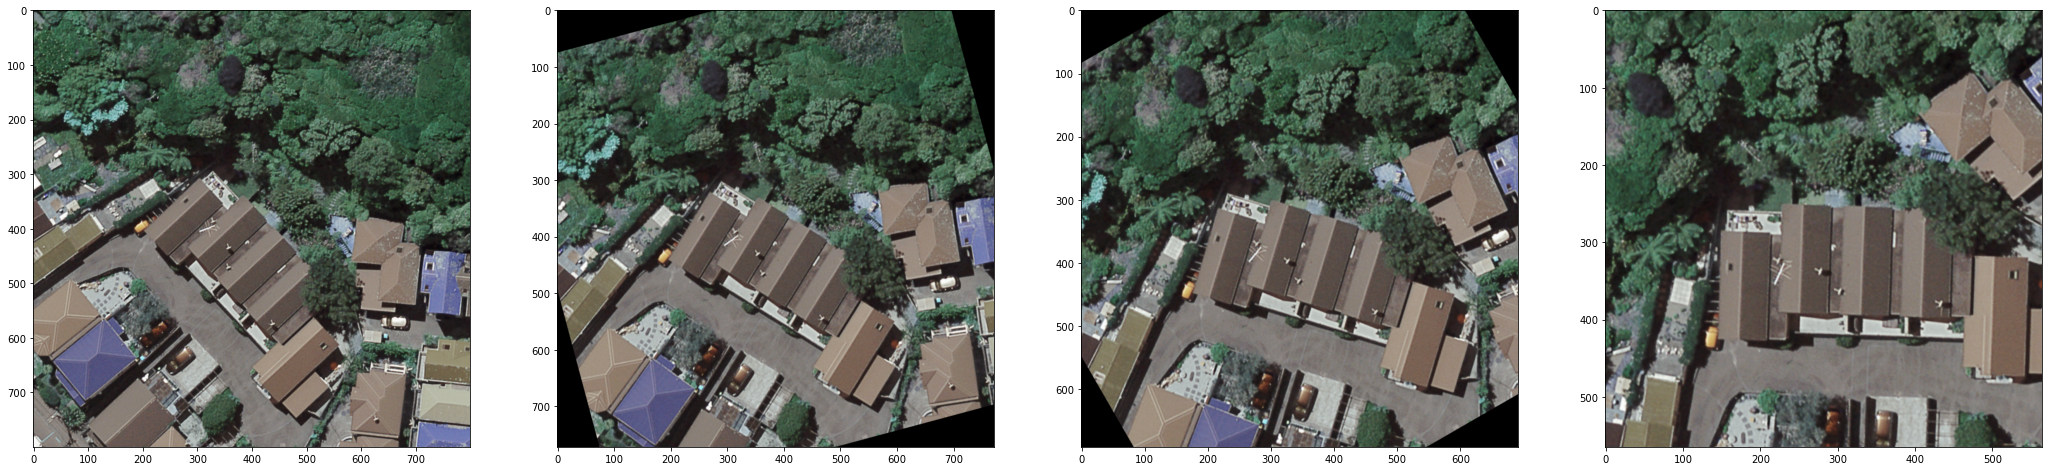

In [83]:
fig, ax = plt.subplots(1, 4, figsize=(36,12))
ax[0].imshow(sample)
ax[1].imshow(rotate_and_clip(sample.copy(), 15))
ax[2].imshow(rotate_and_clip(sample.copy(), 30))
ax[3].imshow(rotate_and_clip(sample.copy(), 45))
plt.show()

772 772 14 14
692 692 54 54
565 565 117 117


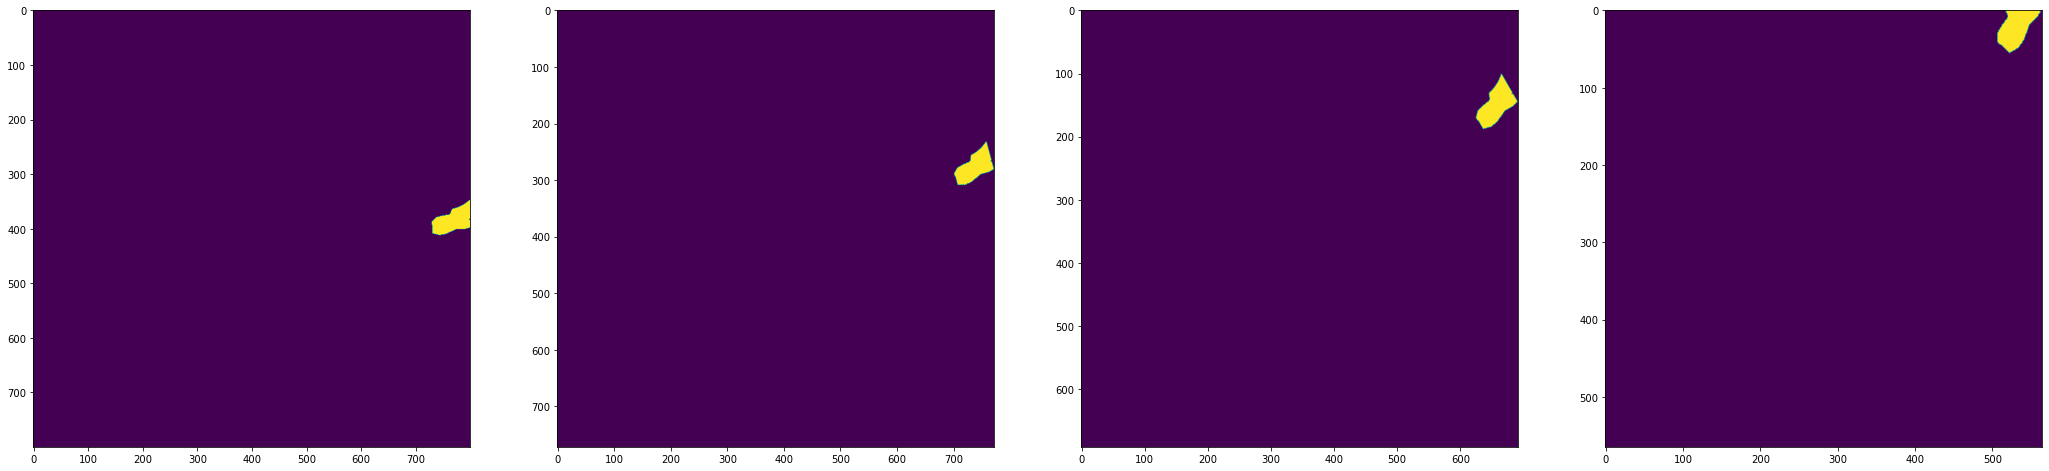

In [85]:
fig, ax = plt.subplots(1, 4, figsize=(36,12))
scaled = (prob * 255).astype(np.uint8)
ax[0].imshow(scaled)
ax[1].imshow(rotate_and_clip(scaled.copy(), 15))
ax[2].imshow(rotate_and_clip(scaled.copy(), 30))
ax[3].imshow(rotate_and_clip(scaled.copy(), 45))
plt.show()

In [91]:
def random_flip(x, y, axis):
    if np.random.random() >= .5:
        x = np.flip(x, axis)
        if y is not None:
            y = np.flip(y, axis)
    return x, y

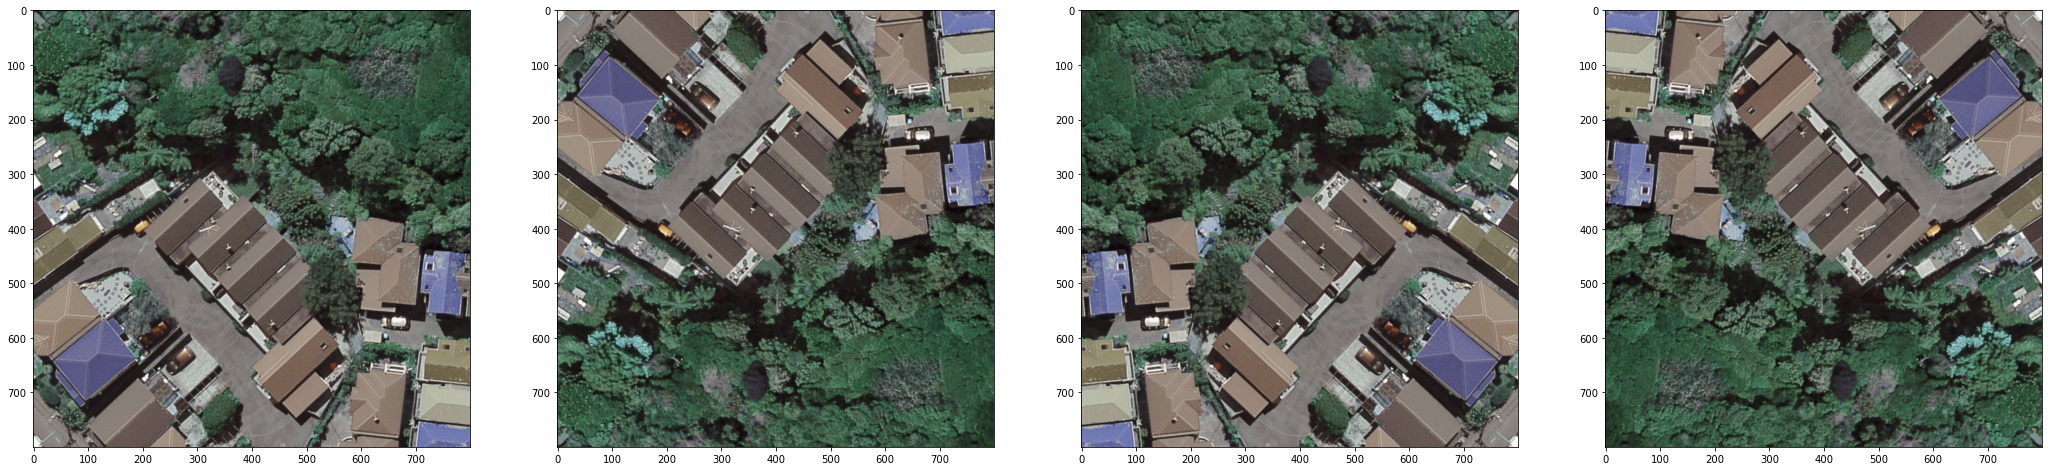

In [93]:
fig, ax = plt.subplots(1, 4, figsize=(36,12))
x0, _ = random_flip(sample.copy(), None, 0)
x1, _ = random_flip(sample.copy(), None, 0)
x2, _ = random_flip(x0.copy(), None, 1)
x3, _ = random_flip(x1.copy(), None, 1)
ax[0].imshow(x0)
ax[1].imshow(x1)
ax[2].imshow(x2)
ax[3].imshow(x3)
plt.show()